In [7]:
import pandas as pd
import numpy as np
import scipy.stats as st

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

df_all = pd.read_csv('/content/Video_Games_all_data.csv')

df_all.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_all.info()
data = df_all.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Which genre is the most often in video games?

In [9]:
data['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

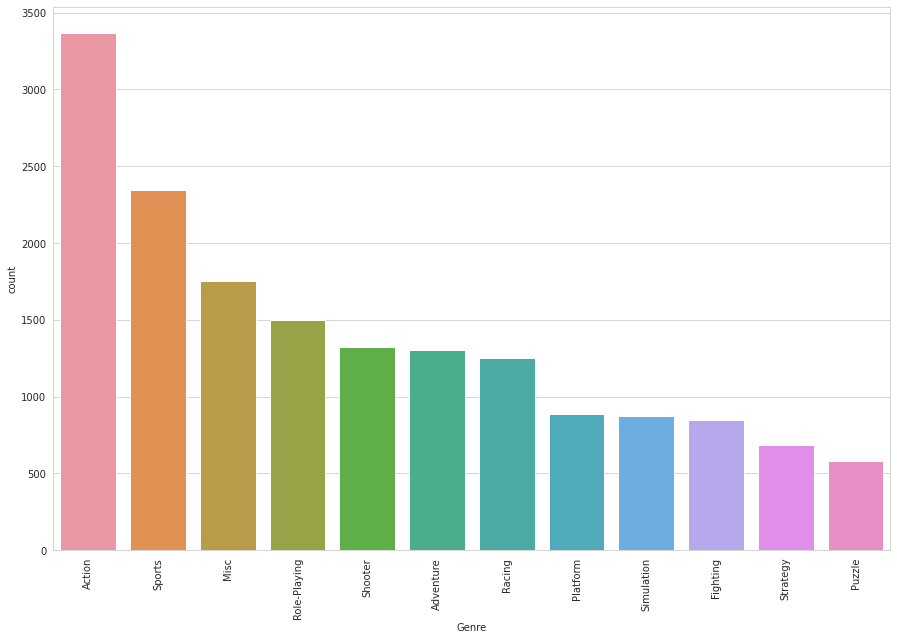

In [12]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Which year has been the most popular by the number of video game releases?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2016.0'),
  Text(15, 0, '2001.0'),
  Text(16, 0, '1998.0'),
  Text(17, 0, '2000.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1990.0'),
  T

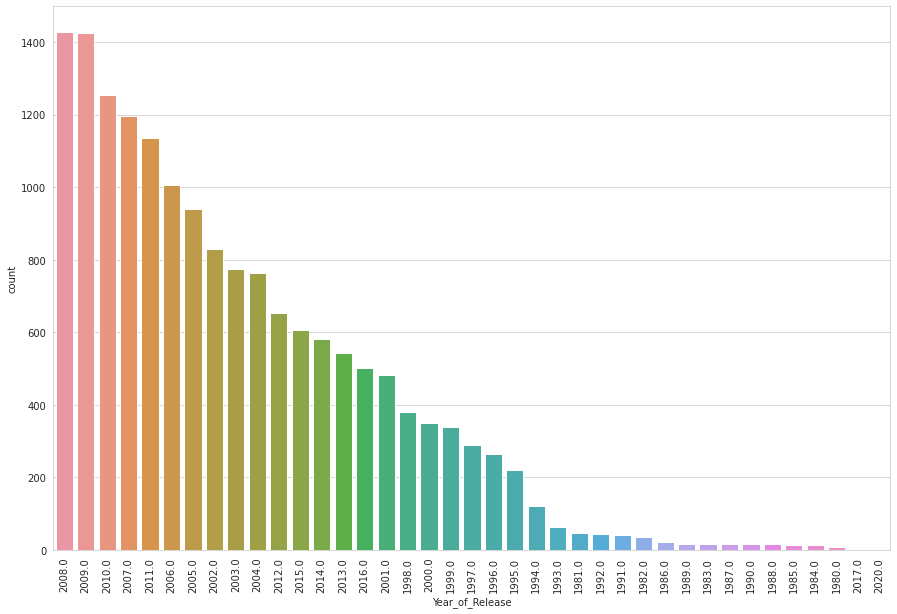

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=data, order = data.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

Let's see the top 5 years for video games by genre

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

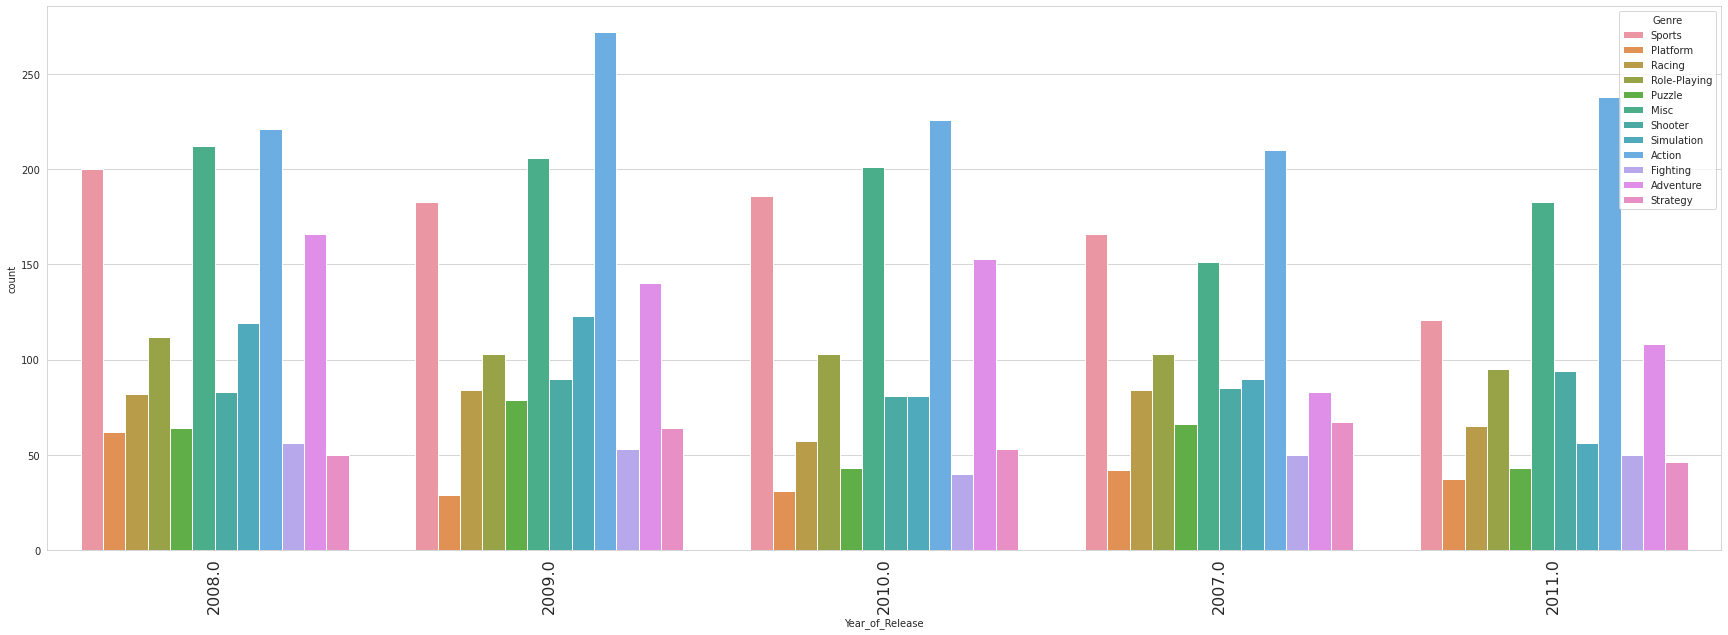

In [20]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year_of_Release", data=data, hue='Genre', order=data.Year_of_Release.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

Which year had the highest sales worldwide?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

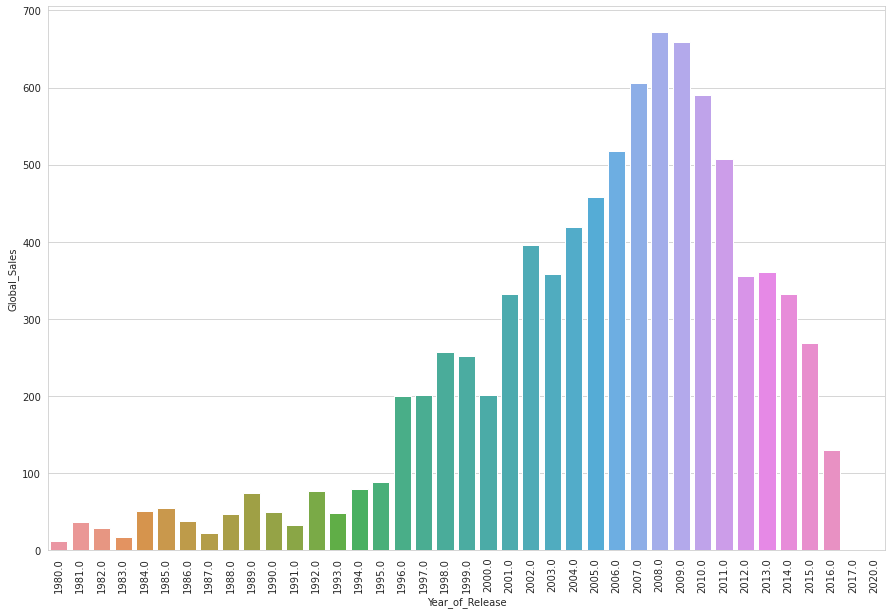

In [22]:
data_year = data.groupby(by=['Year_of_Release'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

Which game genre had been the released the most in a single year?

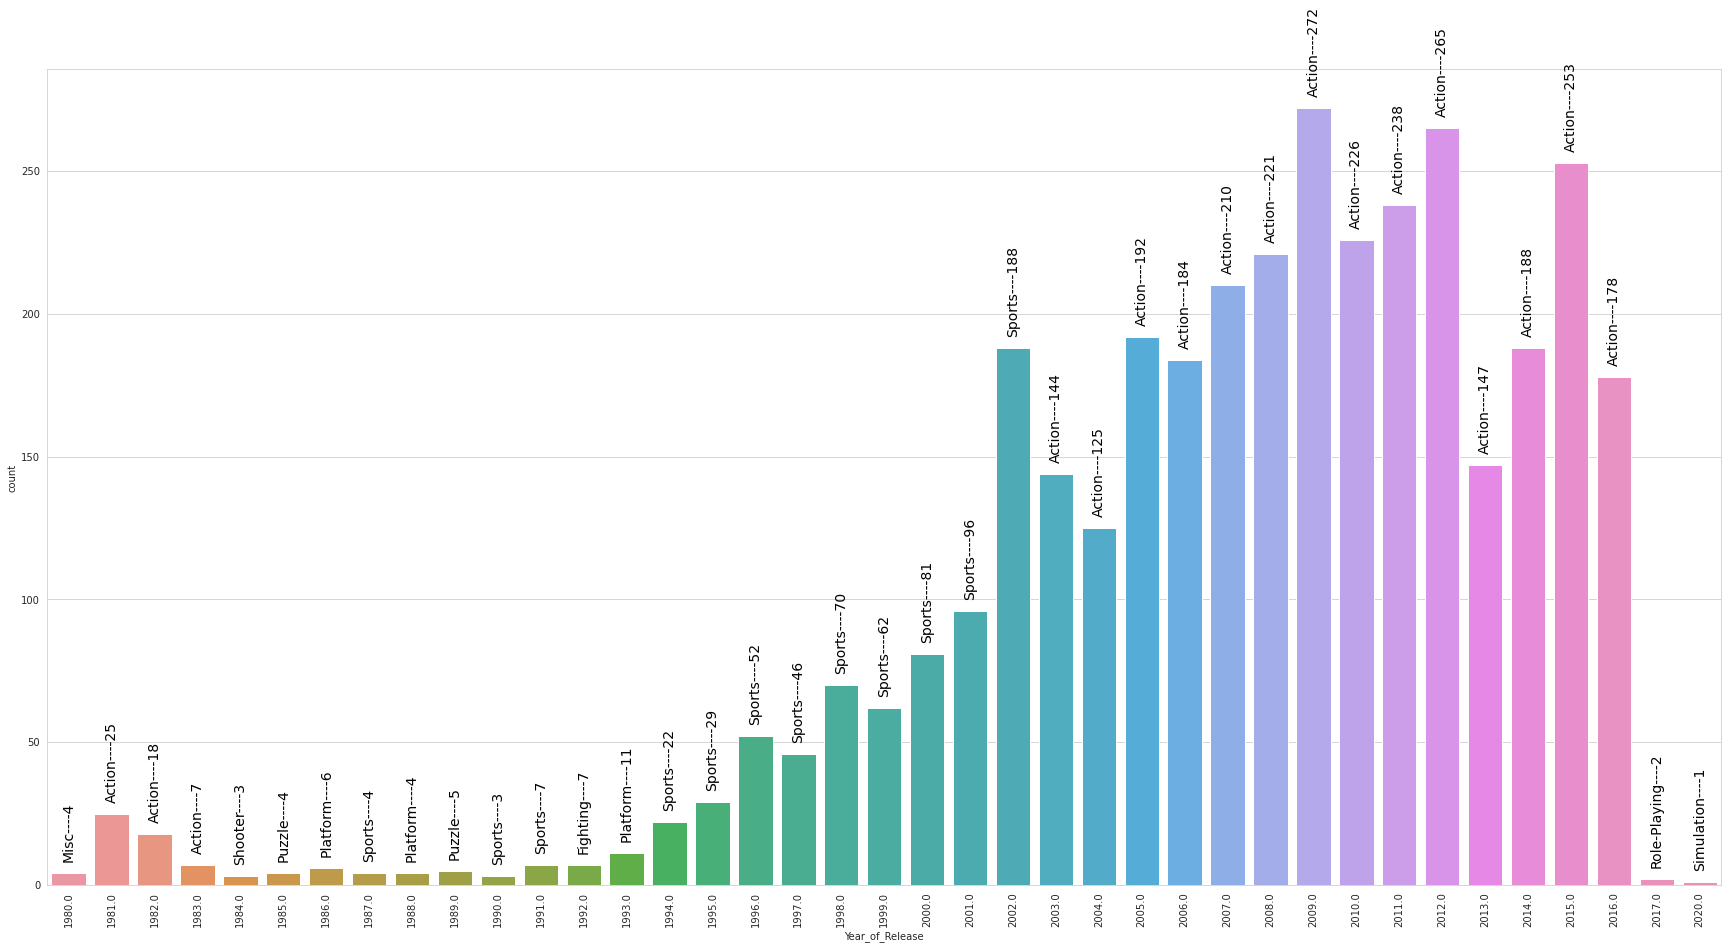

In [23]:
year_max_df = data.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year_of_Release'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year_of_Release", "count"], keep='last').reset_index(drop=True)

genre = year_max_genre['Genre'].values

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Which game genre sold the most in a single year?

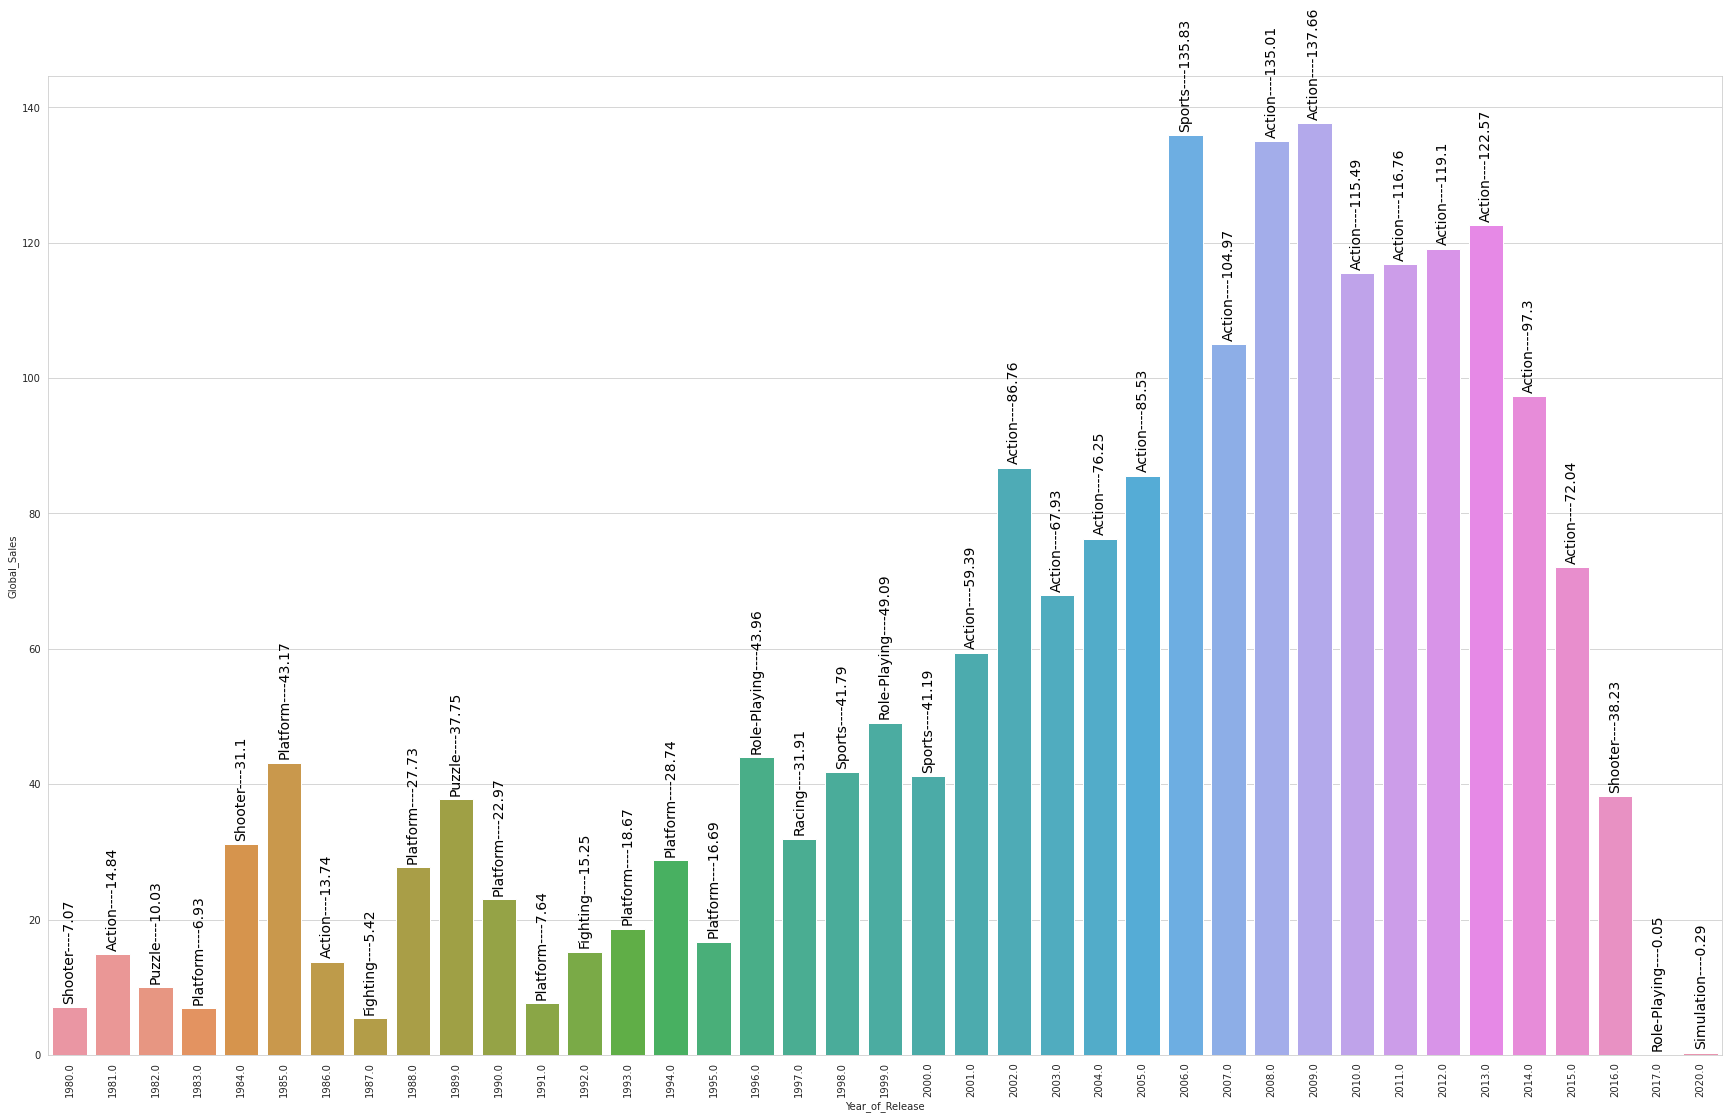

In [24]:
year_sale_dx = data.groupby(by=['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year_of_Release'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year_of_Release', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Which genres have the highest global selling price?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

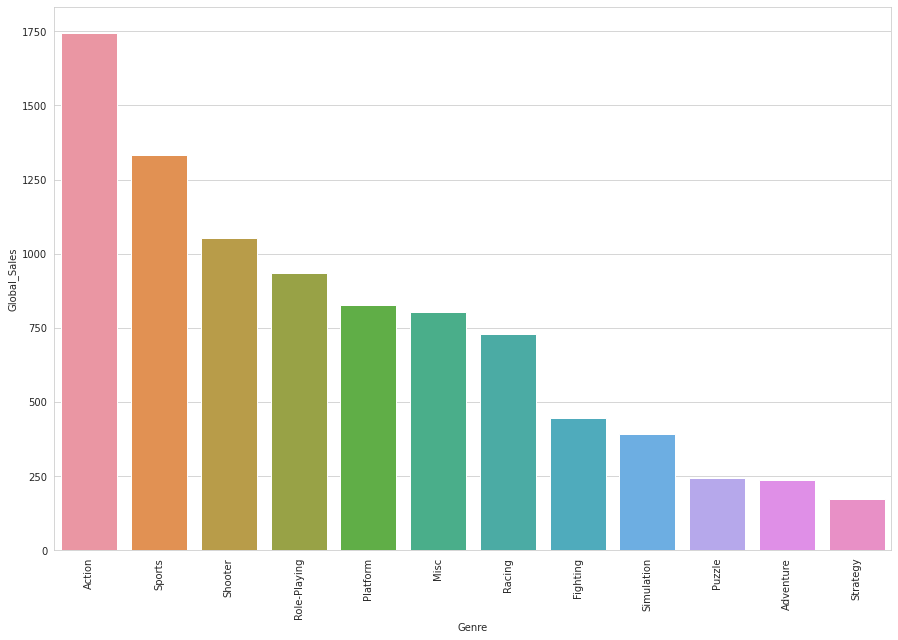

In [25]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

Which platforms are the most expensive?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PS4'),
  Text(8, 0, 'PSP'),
  Text(9, 0, 'PC'),
  Text(10, 0, '3DS'),
  Text(11, 0, 'XB'),
  Text(12, 0, 'GB'),
  Text(13, 0, 'NES'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

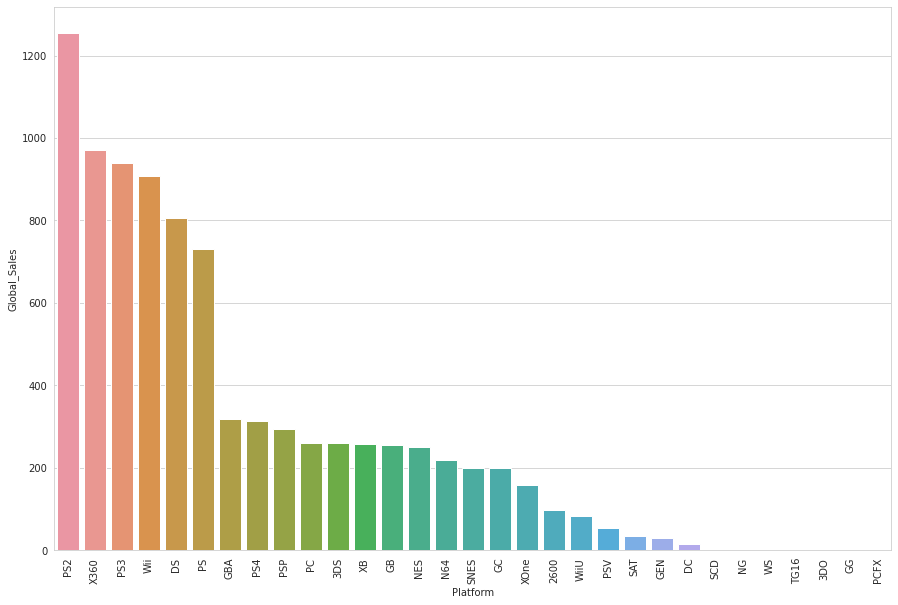

In [26]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

Which single game is the most expensive?

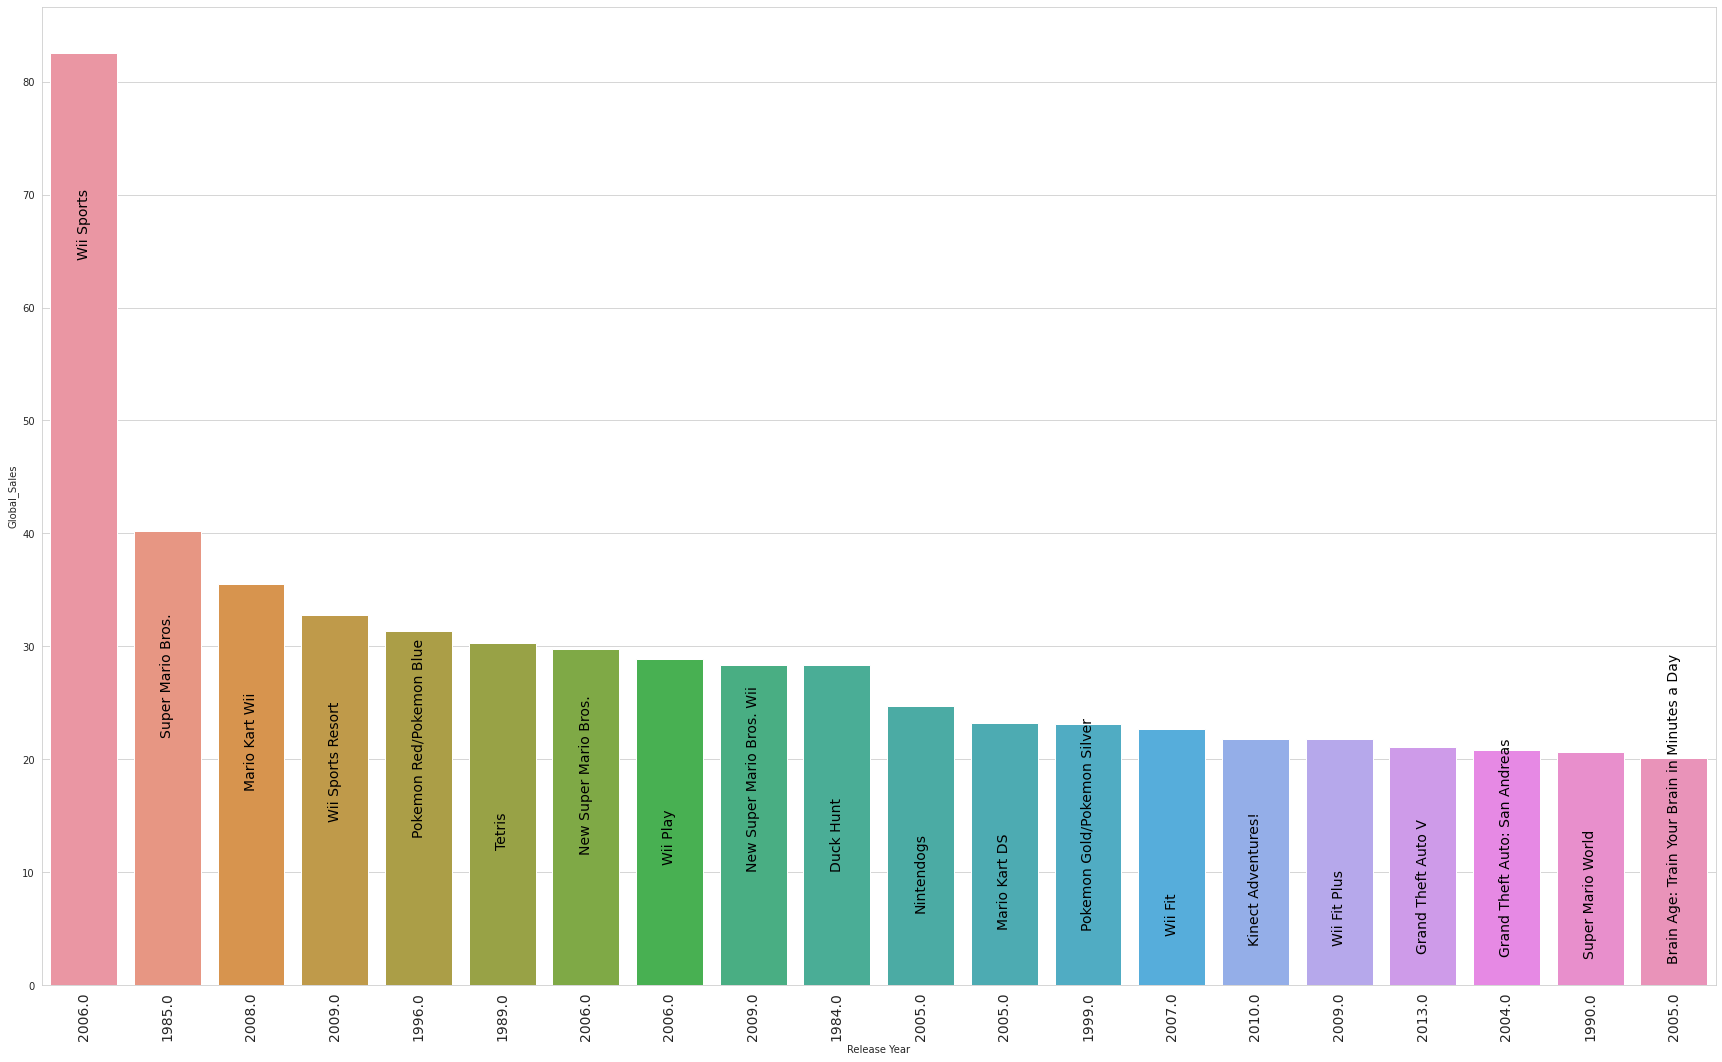

In [27]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year_of_Release', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

name = top_game_sale['Name']
year = top_game_sale['Year_of_Release']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year_of_Release'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

Sales comparison by genre

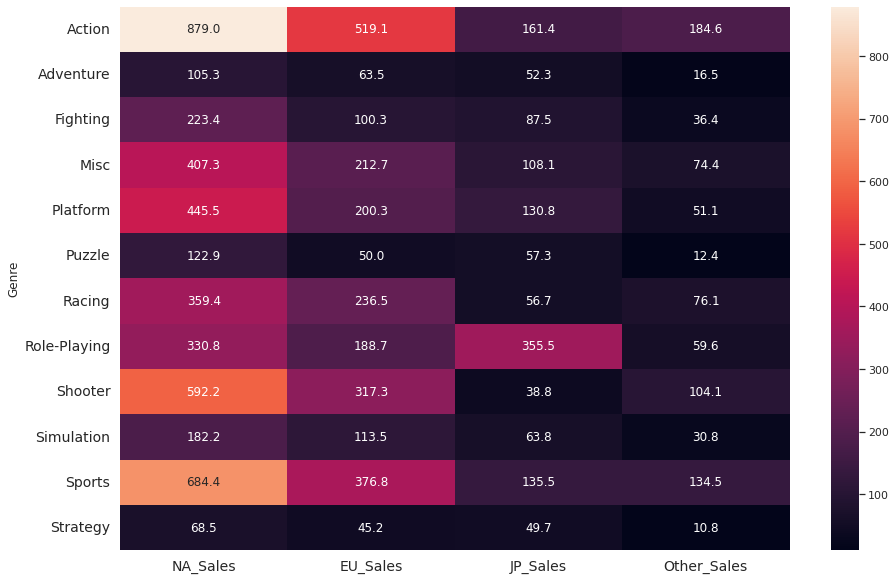

In [28]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()

plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [30]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,879.01
1,Adventure,NA_Sales,105.26
2,Fighting,NA_Sales,223.36
3,Misc,NA_Sales,407.27
4,Platform,NA_Sales,445.50


<Axes: xlabel='Genre', ylabel='Sale_Price'>

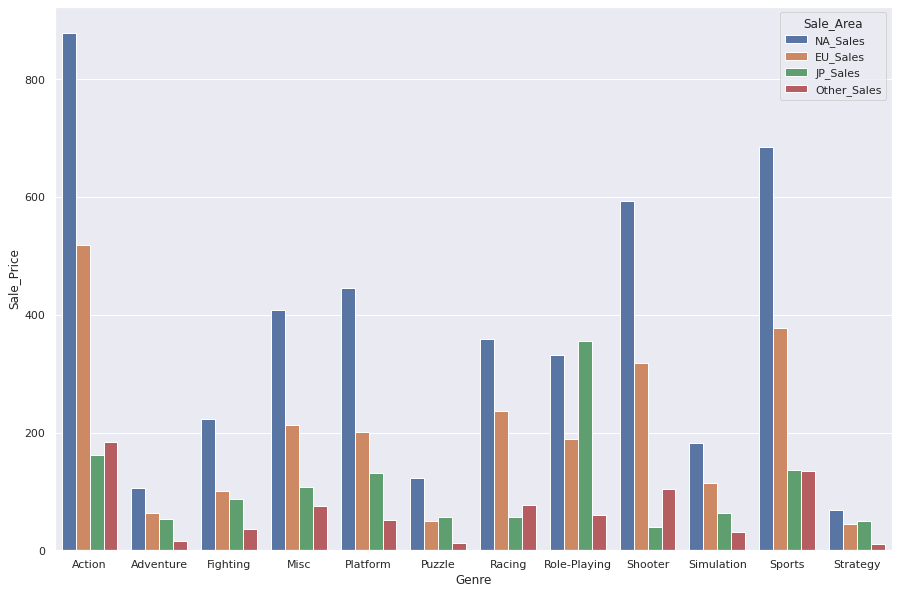

In [31]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

Sales comparison by platform

In [32]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.36,28.96,3.77,8.45
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.68,12.76,3.79,3.29
3,Wii,15.61,10.93,3.28,2.95
4,GB,11.27,8.89,10.22,1.00


In [33]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,83.49
3,DC,NA_Sales,5.43
4,DS,NA_Sales,382.67


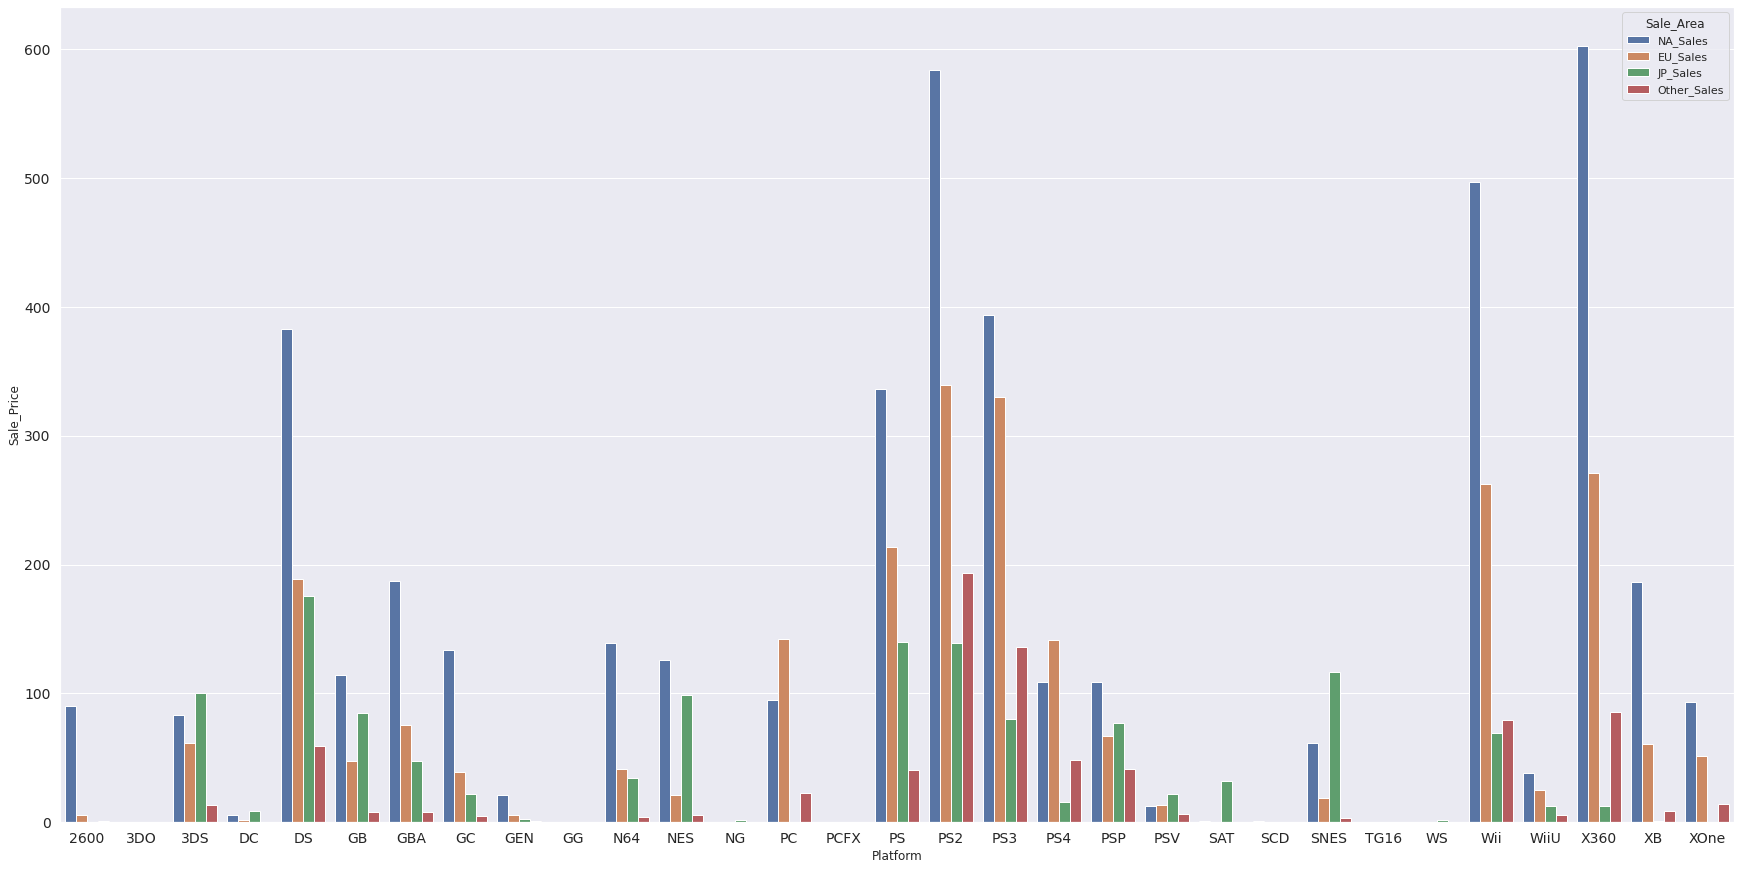

In [34]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Top publishers

In [35]:
top_publisher = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Midway Games'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

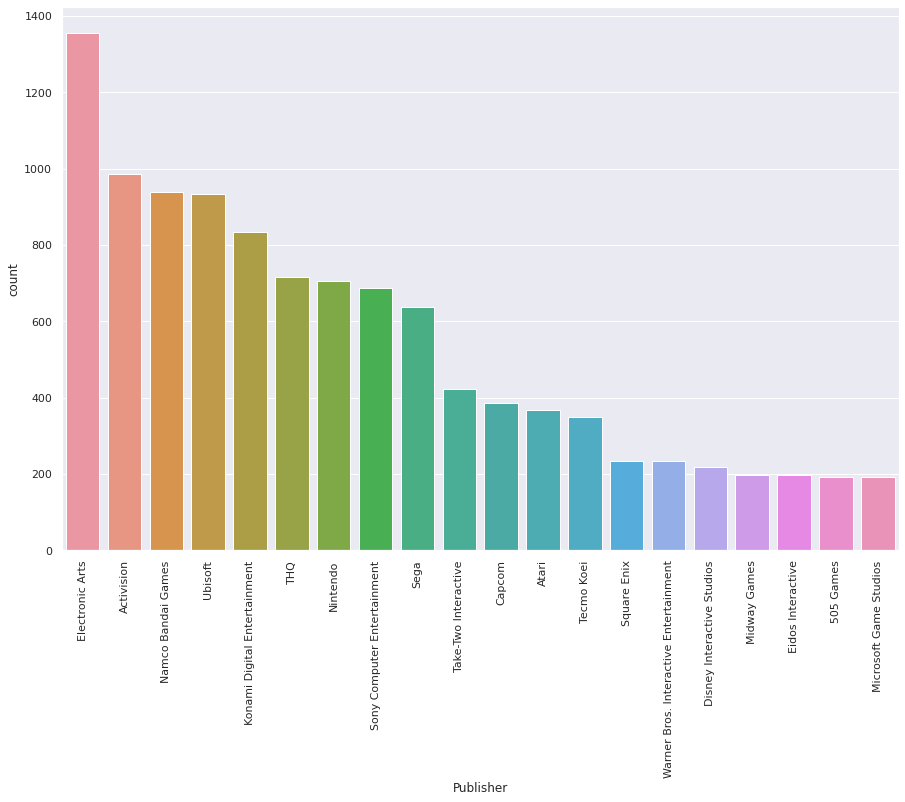

In [37]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

Top global sales by publisher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

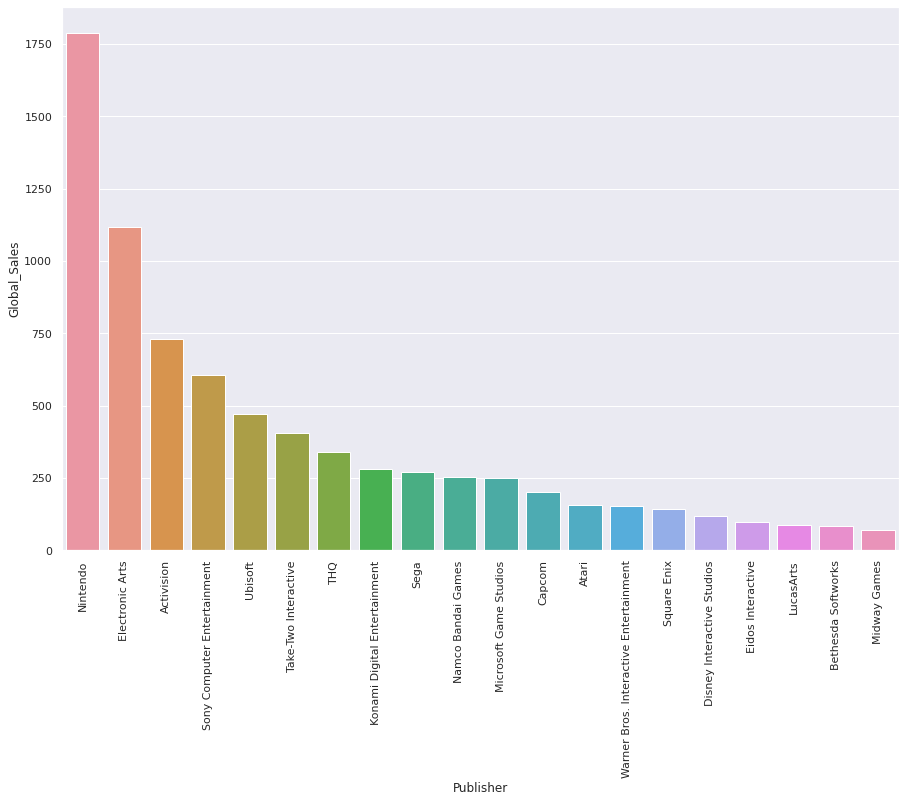

In [38]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

Publisher comparison

In [47]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Nintendo,11.27,8.89,10.22,1.00,31.37


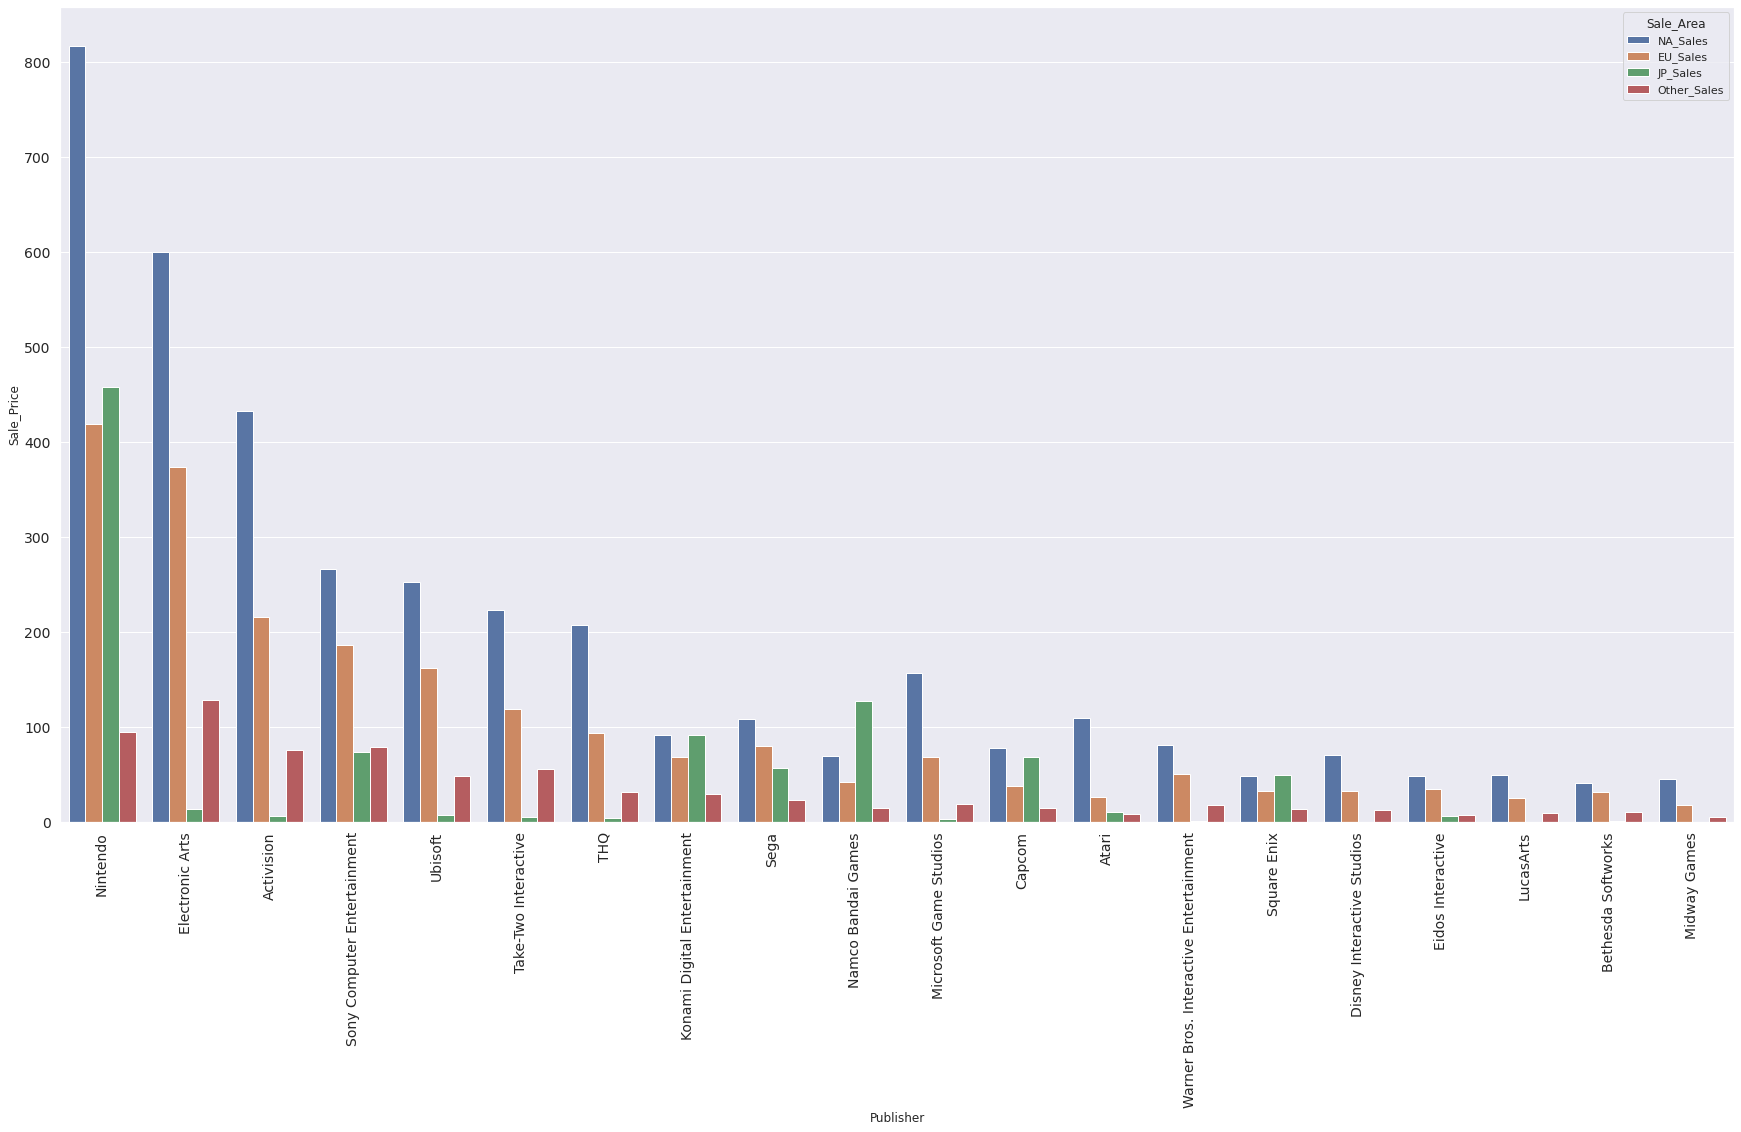

In [48]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

Top publisher by number (count) each year

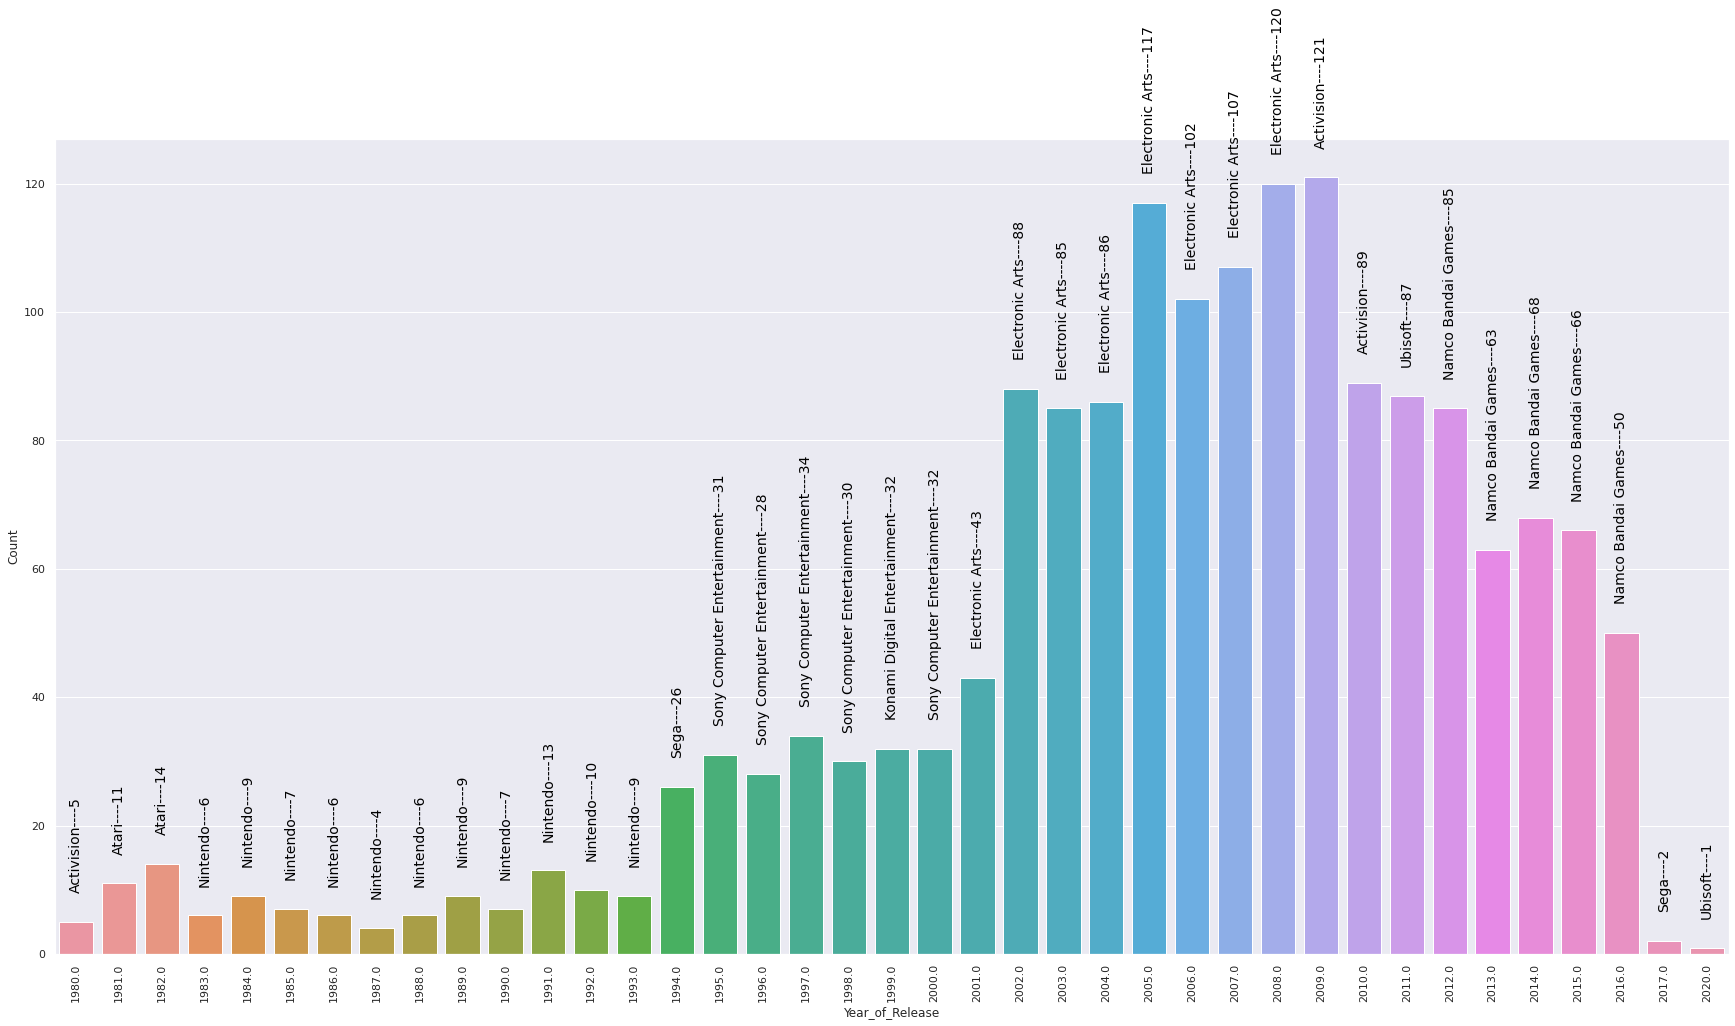

In [49]:
top_publisher =  data[['Year_of_Release', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year_of_Release', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year_of_Release'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year_of_Release", "Count"], keep='last').reset_index(drop=True)

publisher= top_publisher_count['Publisher']
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Total revenue by region

In [50]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4402.62
1,EU_Sales,2424.67
2,JP_Sales,1297.43
3,Other_Sales,791.34


<Axes: xlabel='region', ylabel='sale'>

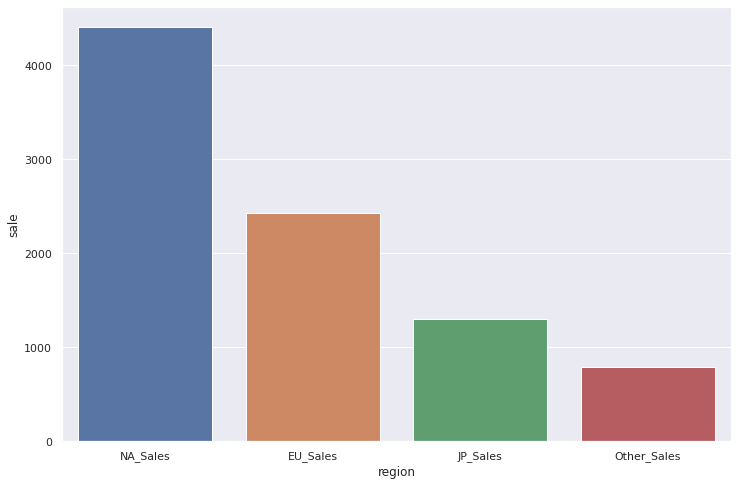

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x7fef1dc36460>,
 [Text(-1.0997903563186415, 0.021474919057257354, 'NA_Sales'),
  Text(0.80071670769775, -0.7542232786209109, 'EU_Sales'),
  Text(0.9343201814851579, 0.5805564558848189, 'JP_Sales'),
  Text(0.3027548547310551, 1.0575157199478304, 'Other_Sales')],
 [Text(-0.5998856489010771, 0.011713592213049464, '49.4%'),
  Text(0.43675456783513633, -0.4113945156114059, '27.2%'),
  Text(0.5096291899009951, 0.3166671577553557, '14.6%'),
  Text(0.1651390116714846, 0.5768267563351801, '8.9%')])

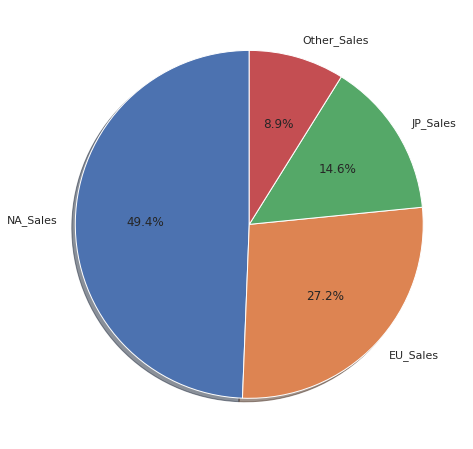

In [52]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Histogram of sales

<ipython-input-53-8cee72f43446>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)


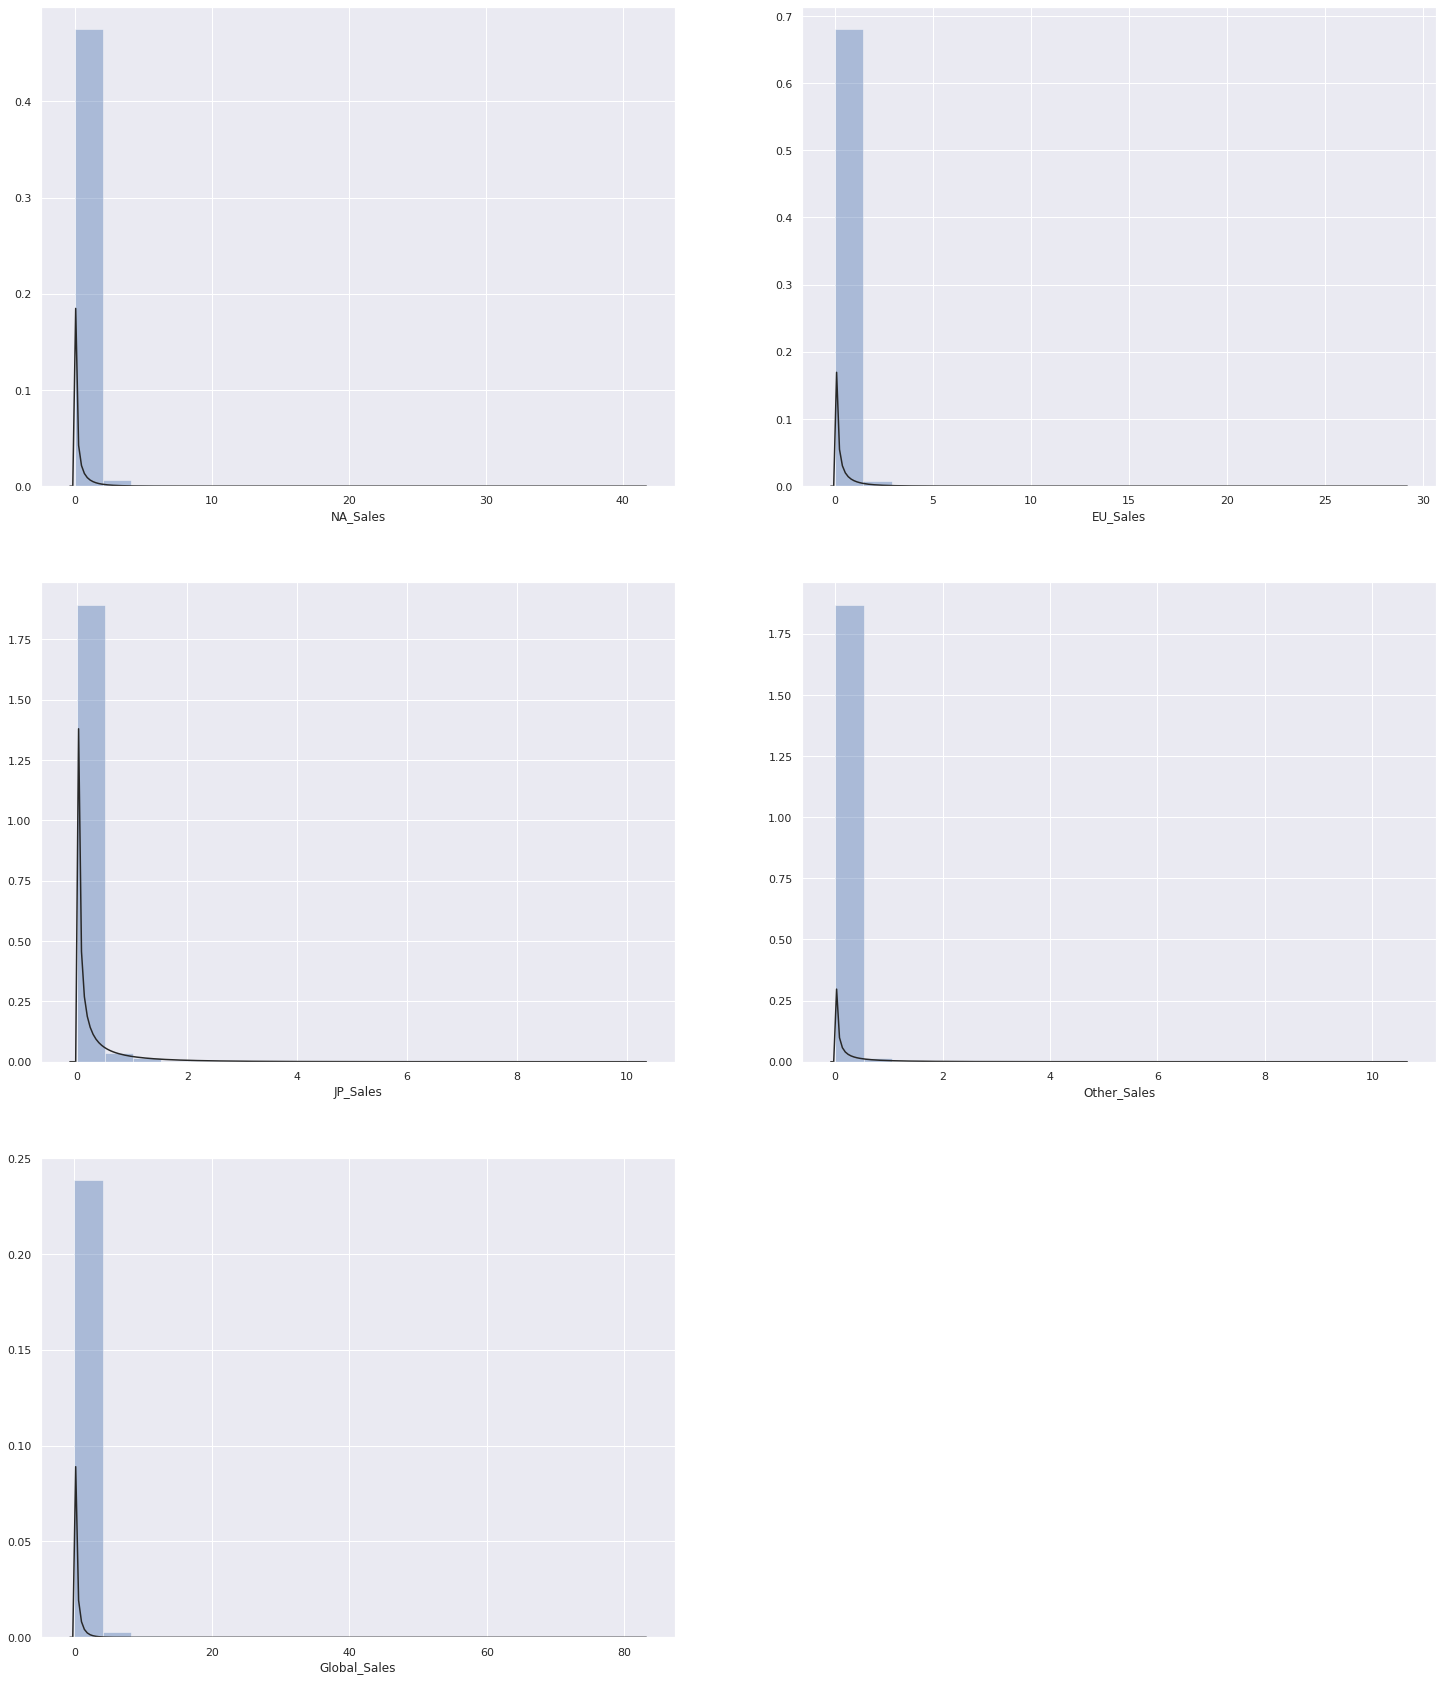

In [53]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

Distribution after log transformations

<ipython-input-55-0a6541bdcabf>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)


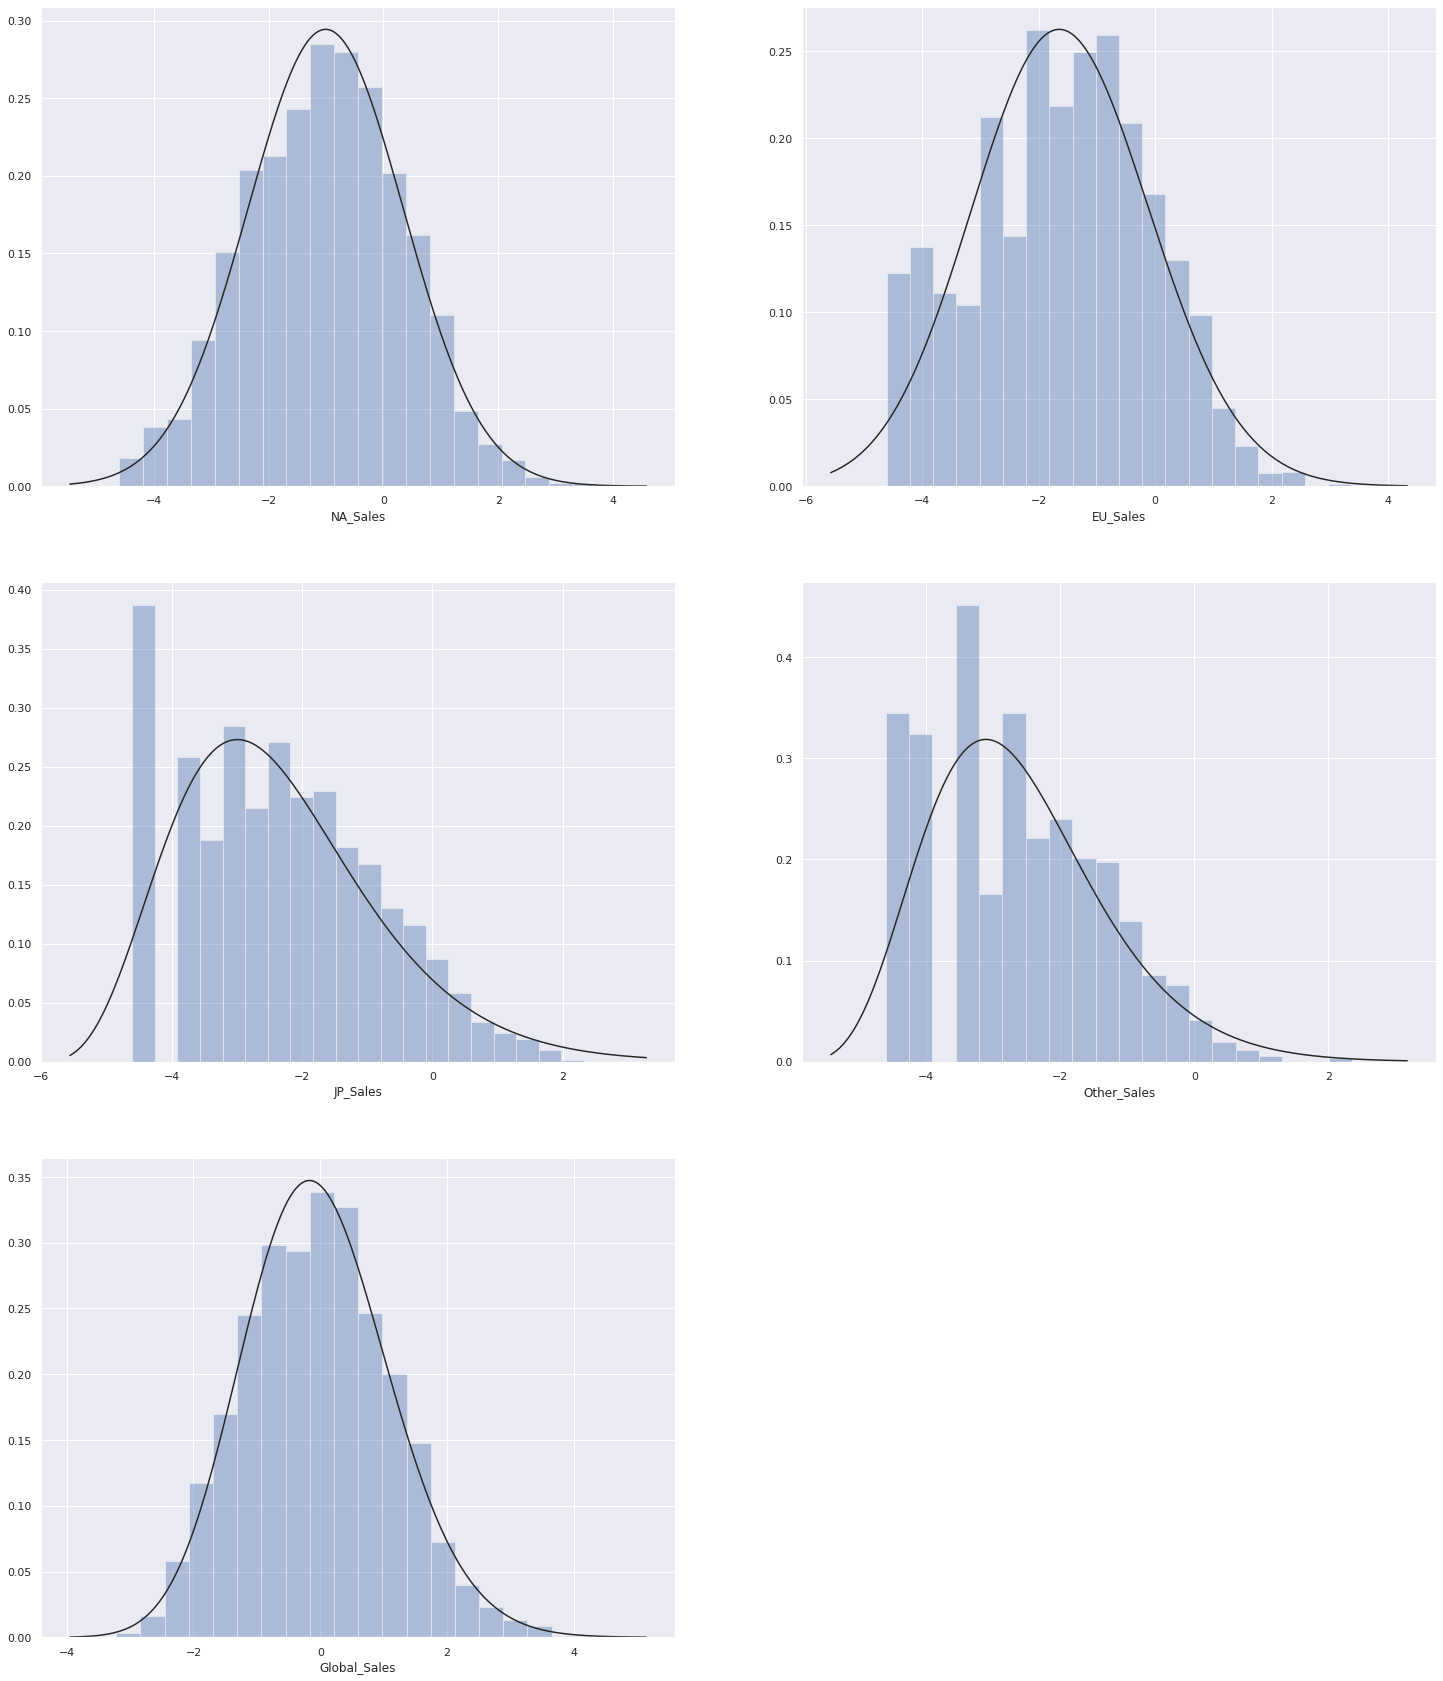

In [55]:
data_hist_log = data.copy()

data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

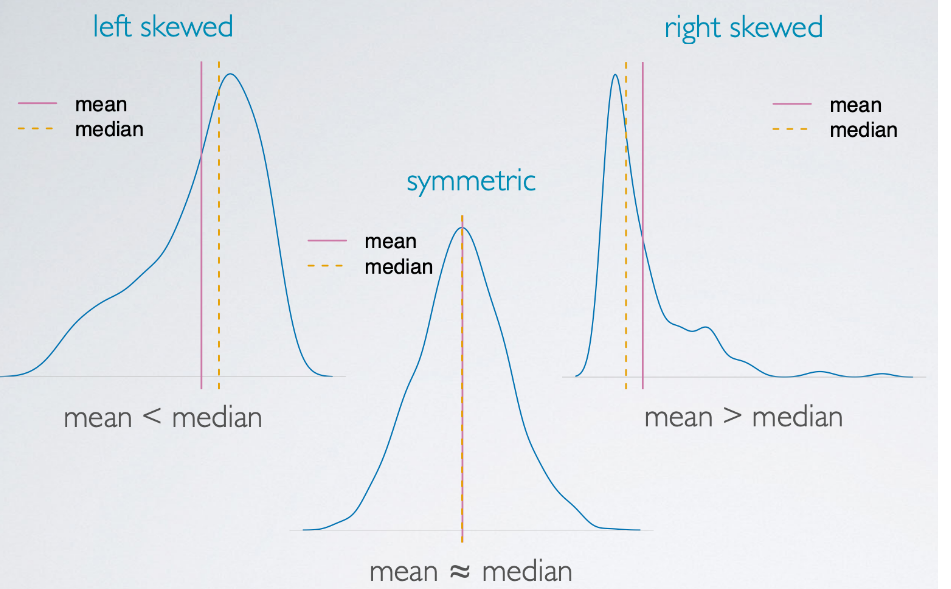

Relation of columns

<Axes: >

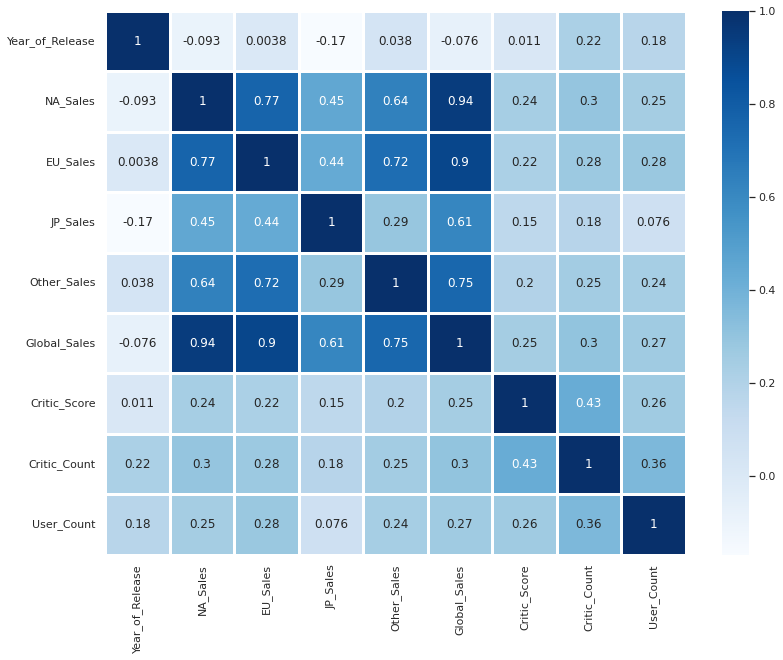

In [56]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

Pair plot

In [58]:
data_pair = data.loc[:,["Year_of_Release","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

,Year_of_Release,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.36,28.96,8.45
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.68,12.76,3.29
3,2009.0,Wii,Sports,15.61,10.93,2.95
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16714,2016.0,PS3,Action,0.00,0.00,0.00
16715,2006.0,X360,Sports,0.00,0.01,0.00
16716,2016.0,PSV,Adventure,0.00,0.00,0.00
16717,2003.0,GBA,Platform,0.01,0.00,0.00


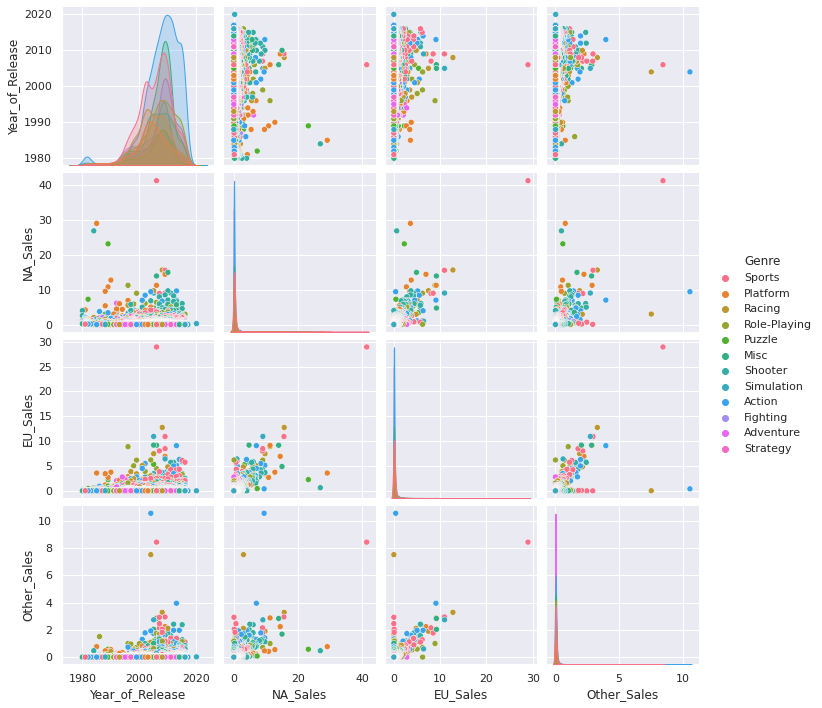

In [59]:
sns.pairplot(data_pair, hue='Genre')

Pair plot but with log transformation

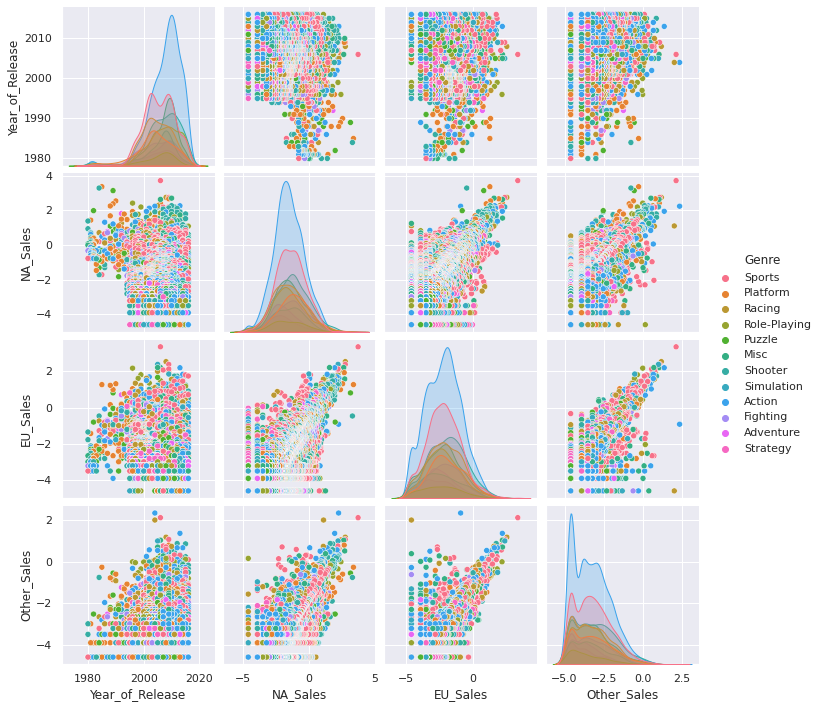

In [60]:
data_pair_log = data_pair.copy()

sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);


sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

Top ten video games by Genre, Publisher, Platforms for each region

In [61]:
from plotly import graph_objects as go
from plotly import express as px

top_sales = data.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

Most common words in the dataset for all categorical values like Name, Publisher, Platform, Genre

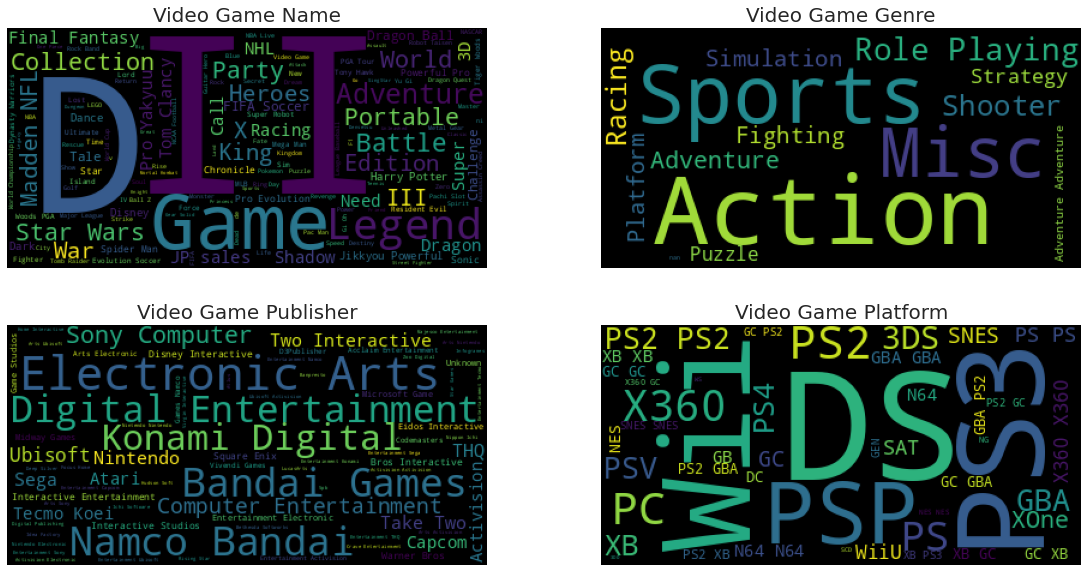

In [64]:

from wordcloud import WordCloud, STOPWORDS

global_sales = data.sort_values(by='Other_Sales', ascending=False)

# plt.subplot(1, 2, 1)

categorical_features = ['Name', 'Genre', 'Publisher', 'Platform']

fig = plt.figure(figsize=(17,17))


for index, col,  in enumerate(categorical_features):
    
    plt.subplot(len(categorical_features), 2, index + 1)

    tmp = global_sales[col].astype(str)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        stopwords=stopwords
    ).generate(" ".join(tmp))

    # Show WordCloud Image
    
    
    plt.imshow(wordcloud)
    plt.title("Video Game " + col, fontsize=20)
    plt.axis('off')
    plt.tight_layout(pad=3)

plt.show()